<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1">Data</a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-2">Baseline</a></span></li><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-3">Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-3.1">Hyperparameter tuning</a></span></li></ul></li><li><span><a href="#Random-forests" data-toc-modified-id="Random-forests-4">Random forests</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-4.1">Hyperparameter tuning</a></span></li><li><span><a href="#OOB-error" data-toc-modified-id="OOB-error-4.2">OOB error</a></span></li></ul></li><li><span><a href="#Model-interpretation" data-toc-modified-id="Model-interpretation-5">Model interpretation</a></span><ul class="toc-item"><li><span><a href="#Tree-variance-for-prediction-confidence" data-toc-modified-id="Tree-variance-for-prediction-confidence-5.1">Tree variance for prediction confidence</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-5.2">Feature importance</a></span></li><li><span><a href="#Removing-low-importance-features" data-toc-modified-id="Removing-low-importance-features-5.3">Removing low-importance features</a></span></li><li><span><a href="#Remove-redundant-features" data-toc-modified-id="Remove-redundant-features-5.4">Remove redundant features</a></span></li><li><span><a href="#Partial-dependance" data-toc-modified-id="Partial-dependance-5.5">Partial dependance</a></span></li><li><span><a href="#Tree-Interperator" data-toc-modified-id="Tree-Interperator-5.6">Tree Interperator</a></span></li><li><span><a href="#Finding-Out-of-Domain-Data" data-toc-modified-id="Finding-Out-of-Domain-Data-5.7">Finding Out-of-Domain Data</a></span></li><li><span><a href="#Imbalanced-learn" data-toc-modified-id="Imbalanced-learn-5.8">Imbalanced learn</a></span></li><li><span><a href="#RandomUnderSampler" data-toc-modified-id="RandomUnderSampler-5.9">RandomUnderSampler</a></span></li><li><span><a href="#RandomOverSampler" data-toc-modified-id="RandomOverSampler-5.10">RandomOverSampler</a></span></li></ul></li></ul></div>

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Data

In [1]:
from fastbook import *
from utils import *
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.metrics import accuracy_score, roc_auc_score 

path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')
Path.BASE_PATH = path
pd.options.display.max_rows = 200
pd.options.display.max_columns = 120

In [2]:
train_ss = pd.read_csv(path/'train_ss.csv', index_col=[0], low_memory=False)

In [3]:
train_ss.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
44771,3031771,0,1087364,117.00,W,12932,361.0,150.0,visa,226.0,debit,204.0,87.0,8.0,NaN,gmail.com,NaN,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,4.0,8.0,8.0,1.0,225.0,1.0,NaN,NaN,NaN,NaN,8.0,232.0,NaN,NaN,NaN,113.0,T,T,T,M0,F,F,F,F,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271831,3258831,0,6592563,22.96,C,5740,555.0,144.0,mastercard,224.0,credit,NaN,NaN,NaN,NaN,msn.com,msn.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M0,NaN,NaN,NaN,NaN,NaN,-5.0,192686.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,102.0,15.0,340.0,474.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 63.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
295064,3282064,0,7288908,24.50,W,7826,481.0,150.0,mastercard,224.0,debit,325.0,87.0,NaN,NaN,NaN,NaN,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,14.0,1.0,324.0,324.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,M1,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248994,3235994,0,5938446,100.00,R,11156,399.0,150.0,american express,223.0,credit,325.0,87.0,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,128724.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,529.0,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10.10,firefox 57.0,24.0,1280x720,match_status:2,T,F,T,F,desktop,rv:57.0
22055,3009055,0,579537,250.00,R,15063,514.0,150.0,visa,226.0,credit,310.0,87.0,NaN,74.0,gmail.com,anonymous.com,3.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,142308.0,NaN,NaN,0.0,-8.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-420.0,New,NotFound,166.0,NaN,372.0,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Mac OS X 10_8_5,safari generic,24.0,2560x1440,match_status:2,T,F,F,F,desktop,MacOS


In [4]:
train_ss.shape

(59054, 95)

In [5]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [7]:
train_ss['isFraud']

44771     0
271831    0
295064    0
248994    0
22055     0
         ..
5077      0
253533    0
10973     0
380298    0
420843    0
Name: isFraud, Length: 59054, dtype: int64

To create a validation set we will take rows with transaction numbers greater than a certain value. These rows are transactions that occour later in time. This seems like a good idea since the test set consists of transactions that happen in the future with respect to our data set.

In [8]:
# The rows with TransactionDT <= 12579058 comprise the first 80% of the data (approximately)
cut_off = math.floor((train_ss['TransactionDT'].max() - train_ss['TransactionDT'].min())*0.8)
cut_off

12579507

In [9]:
cond = train_ss['TransactionDT'] <= cut_off
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [10]:
cat = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 
       'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 
       'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38'] 
cont = ['TransactionID', 'TransactionDT', 'TransactionAmt',
        'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 
        'C10', 'C11','C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 
        'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'id_01', 'id_02', 
        'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 
        'id_11']
dep_var = 'isFraud'


In [12]:
len(cont),len(cat)

(45, 49)

In [13]:
assert len(cat)+len(cont)==(len(train_ss.columns)-1)

In [14]:
procs = [Categorify, FillMissing]

Categorify replaces categorical columns with numerical categorical columns. FillMissing replaces missing values with the median of the column and creates a new Boolean column that records wether data was missing or not.

In [15]:
to = TabularPandas(train_ss, procs, cat, cont, y_names=dep_var, splits=splits)

In [16]:
to.show()

,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,DeviceType,DeviceInfo,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na,TransactionID,TransactionDT,TransactionAmt,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,isFraud
44771,W,12932,361,150,visa,226,debit,204,87,gmail.com,#na#,T,T,T,M0,F,F,F,F,T,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,True,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3031771,1087364,117.000000,8.0,32.0,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,4.0,8.0,8.0,1.0,225.0,1.0,0.0,0.0,44.625000,0.666666,8.0,232.0,0.0,0.0,0.0,113.0,-5.0,123901.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
271831,C,5740,555,144,mastercard,224,credit,#na#,#na#,msn.com,msn.com,#na#,#na#,#na#,M0,#na#,#na#,#na#,#na#,#na#,desktop,Windows,NotFound,52,#na#,New,NotFound,102,15,340,474,#na#,#na#,#na#,#na#,#na#,#na#,#na#,New,NotFound,#na#,chrome 63.0,#na#,#na#,#na#,F,F,T,F,True,True,False,True,True,False,True,False,True,True,True,False,True,False,False,False,False,False,False,True,True,False,False,True,True,True,True,False,3258831,6592563,22.959999,8.0,32.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,99.0,8.0,0.0,10.0,0.0,0.0,44.625000,0.666666,0.0,37.0,0.0,0.0,0.0,0.0,-5.0,192686.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
295064,W,7826,481,150,mastercard,224,debit,325,87,#na#,#na#,#na#,#na#,#na#,M1,T,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,True,True,False,False,False,True,True,True,True,True,True,False,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,3282064,7288908,24.500000,8.0,32.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,14.0,1.0,324.0,324.0,5.0,24.0,10.0,0.0,0.0,44.625000,0.666666,15.0,37.0,0.0,0.0,0.0,15.0,-5.0,123901.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
248994,R,11156,399,150,american express,223,credit,325,87,gmail.com,gmail.com,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,desktop,rv:57.0,NotFound,49,-300,New,NotFound,166,#na#,529,549,#na#,#na#,#na#,#na#,#na#,#na#,#na#,New,NotFound,Mac OS X 10.10,firefox 57.0,24,1280x720,match_status:2,T,F,T,F,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,False,False,True,True,True,True,False,3235994,5938446,100.000000,8.0,32.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625000,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,-5.0,128724.0,0.0,0.0,0.0,0.0,15.0,-33.0,0.0,0.0,100.0,0
22055,R,15063,514,150,visa,226,credit,310,87,gmail.com,anonymous.com,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,desktop,MacOS,NotFound,49,-420,New,NotFound,166,#na#,372,225,#na#,#na#,#na#,#na#,#na#,#na#,#na#,New,NotFound,Mac OS X 10_8_5,safari generic,24,2560x1440,match_status:2,T,F,F,F,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,False,False,True,True,True,True,False,3009055,579537,250.000000,8.0,74.0,3.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625000,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,-5.0,142308.0,0.0,0.0,0.0,-8.0,15.0,-33.0,0.0,0.0,100.0,0
109762,R,6741,583,150,visa,195,credit,330,87,icloud.com,anonymous.com,#na#,

In [17]:
to.items.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_01,id_02,id_03,id_04,id_05,...,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,dist1_na,dist2_na,D1_na,D2_na,D3_na,D4_na,D5_na,D6_na,D7_na,D8_na,D9_na,D10_na,D11_na,D12_na,D13_na,D14_na,D15_na,id_01_na,id_02_na,id_03_na,id_04_na,id_05_na,id_06_na,id_07_na,id_08_na,id_09_na,id_10_na,id_11_na
44771,3031771,0,1087364,117.000000,5,3850,261,32,4,70,2,39,33,8.0,32.0,17,0,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,2.0,0.0,14.0,4.0,8.0,8.0,1.0,225.0,1.0,0.0,0.0,44.625,0.666666,8.0,232.0,0.0,0.0,0.0,113.0,2,2,2,1,1,1,1,1,2,-5.0,123901.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,1,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
271831,3258831,0,6592563,22.959999,1,1532,455,27,3,68,1,0,0,8.0,32.0,32,32,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,99.0,8.0,0.0,10.0,0.0,0.0,44.625,0.666666,0.0,37.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,-5.0,192686.0,0.0,0.0,0.0,...,0.0,0.0,100.0,2,26,0,2,2,2,5,137,136,0,0,0,0,0,0,0,2,2,0,37,0,0,0,1,1,2,1,1,734,2,2,1,2,2,1,2,1,2,2,2,1,2,1,1,1,1,1,1,2,2,1,1,2,2,2,2,1
295064,3282064,0,7288908,24.500000,5,2212,381,32,3,68,2,73,33,8.0,32.0,0,0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,14.0,1.0,324.0,324.0,5.0,24.0,10.0,0.0,0.0,44.625,0.666666,15.0,37.0,0.0,0.0,0.0,15.0,0,0,0,2,2,0,0,0,0,-5.0,123901.0,0.0,0.0,0.0,...,0.0,0.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,2,2,2,2,2,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2
248994,3235994,0,5938446,100.000000,3,3290,299,32,1,67,1,73,33,8.0,32.0,17,17,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,0,0,0,0,0,0,0,0,0,-5.0,128724.0,0.0,0.0,0.0,...,0.0,0.0,100.0,2,24,6,2,2,33,0,254,162,0,0,0,0,0,0,0,2,2,15,65,2,21,3,2,1,2,1,1,799,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,1,2,2,2,2,1
22055,3009055,0,579537,250.000000,3,4540,414,32,4,70,1,70,33,8.0,74.0,17,2,3.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,0.0,2.0,2.0,0.0,99.0,8.0,24.0,10.0,0.0,0.0,44.625,0.666666,12.0,37.0,0.0,0.0,0.0,48.0,0,0,0,0,0,0,0,0,0,-5.0,142308.0,0.0,0.0,0.0,...,0.0,0.0,100.0,2,24,4,2,2,33,0,159,45,0,0,0,0,0,0,0,2,2,40,97,2,86,3,2,1,1,1,1,310,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,1,1,2,2,2,2,1


In [18]:
to['addr1'], type(train_ss['addr1'].iloc[0])

(44771      39
 271831      0
 295064     73
 248994     73
 22055      70
          ... 
 511411     39
 588799      0
 556655    109
 483712     78
 590071     40
 Name: addr1, Length: 59054, dtype: int16,
 numpy.float64)

Categorical features have been label encoded and memory reduction applied.

In [18]:
to.cat_names

(#77) ['ProductCD','card1','card2','card3','card4','card5','card6','addr1','addr2','P_emaildomain'...]

In [19]:
to.cont_names

(#45) ['TransactionID','TransactionDT','TransactionAmt','dist1','dist2','C1','C2','C3','C4','C5'...]

In [20]:
to.classes['card1']

(#5644) ['#na#',1001,1004,1012,1013,1015,1018,1021,1022,1027...]

In [21]:
to.train.xs.shape[1]

122

In [22]:
assert (len(to.cont_names)+len(to.cat_names)+1)==to.items.shape[1]

In [41]:
(path/'to_ss.pkl').save(to)

In [7]:
to = (path/'to_ss.pkl').load()

In [23]:
xs, y             = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [24]:
xs.shape, valid_xs.shape

((48357, 122), (10697, 122))

The number of columns has increased from 95 to 122 because the FillMissing proc has created new columns to indicate where data was missing.

In [26]:
np.array(xs.columns.to_list())

array(['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType',
       'DeviceInfo', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'dist1_na', 'dist2_na', 'D1_na', 'D2_na', 'D3_na', 'D4_na', 'D5_na', 'D6_na', 'D7_na', 'D8_na', 'D9_na', 'D10_na',
       'D11_na', 'D12_na', 'D13_na', 'D14_na', 'D15_na', 'id_01_na', 'id_02_na', 'id_03_na', 'id_04_na', 'id_05_na', 'id_06_na', 'id_07_na', 'id_08_na', 'id_09_na', 'id_10_na', 'id_11_na',
       'TransactionID', 'TransactionDT', 'TransactionAmt', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5',
       'D6', 'D7', 'D8', 'D9', 'D10

# Baseline

Maybe use naive bayes for baseline

In [114]:
from sklearn.naive_bayes import GaussianNB

In [115]:
gnb = GaussianNB()

In [116]:
baseline_pred = gnb.fit(xs, y).predict_proba(valid_xs)

In [117]:
baseline_pred[:,1]

array([0.00010619, 0.00041698, 0.00058744, ..., 0.00084944, 0.02236721, 0.00105125])

In [118]:
roc_auc_score(valid_y, baseline_pred[:,1])

0.7475553456041497

# Decision Trees

## Hyperparameter tuning

(source)[https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680]
1. criterion='entropy' or criterion='gini', entropy seems to work a little better!
2. splitter='best' or splitter='random', use best unless there is an overfitting problem, than consider 'random' 
   (still random splitting doesn't seem to me like the first thing to combat overfitting.
3. max_depth='None', I will instead control the depth of the tree using max_leaf_nodes, min_samples_leaf and min_samples_split.
4. min_samples_split, ideal value for CART algorithim implemented in scikit is in [1,40].
5. min_samples_leaf, ideal value for CART algorithim implemented in scikit is in [1,20].
6. min_weight_fraction_leaf, after setting sample_weights this will help deal with the class imbalance
7. max_features='sqrt', 'log2', 'None', just try them.
8. min_impurity_decrease, leave it at 0.
9. class_weight='balanced'!
10. presort, 

In [65]:
def m_roc(y, xs):
    preds = m.predict_proba(xs)
    preds_isFraud = preds[:,1]
    return roc_auc_score(y, preds_isFraud)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [183]:
parameters = {'min_samples_split': [2, 5, 10, 20, 30, 40], 
              'min_samples_leaf':[1, 5, 10, 20], 
              'max_features':('sqrt', 'log2', 'auto'), 'max_leaf_nodes':[5, 10, 20, 30, 40, 50, 60]}

In [184]:
clf = GridSearchCV(DecisionTreeClassifier(criterion='entropy', class_weight='balanced'), parameters, 
                   scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)

In [185]:
clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

(DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10),
 0.8206611341768142,
 {'max_features': 'sqrt',
  'max_leaf_nodes': 50,
  'min_samples_leaf': 1,
  'min_samples_split': 10})

In [68]:
m = DecisionTreeClassifier(max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8800230339794805, 0.8139962418116771)

In [225]:
m = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8525205461119943, 0.797996003332604)

In [247]:
m = DecisionTreeClassifier(max_leaf_nodes=50, criterion='entropy', max_features='sqrt', class_weight='balanced')
m.fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8403993850850318, 0.7788475536639813)

# Random forests

In [58]:
def rf(xs, y, **kwargs):
    max_samples = math.ceil(len(xs)*0.66)
    return RandomForestClassifier(n_jobs=-1, 
        max_samples=max_samples, oob_score=True, **kwargs).fit(xs, y)

In [417]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8958658802603373, 0.8352799790790676)

In [253]:
m = rf(xs, y, n_estimators=1000, class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.896220060173573, 0.8357899134500599)

In [254]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy', 
       max_features='sqrt', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8960750353405803, 0.8352420478686533)

In [255]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])

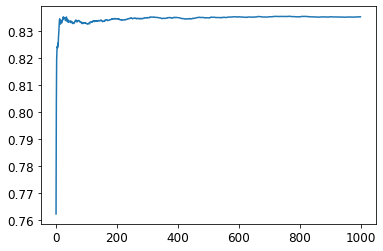

In [256]:
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(1000)])

should be able to get away with using between 50 and 400 estimators

In [260]:
m = rf(xs, y, n_estimators=200, max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8949033096819884, 0.8353123007442798)

In [261]:
m = rf(xs, y, n_estimators=200, class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8954858885878351, 0.8358842072336955)

In [262]:
m = rf(xs, y, n_estimators=200, max_leaf_nodes=50, criterion='entropy', 
       max_features='sqrt', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8955563810587842, 0.8352978761994743)

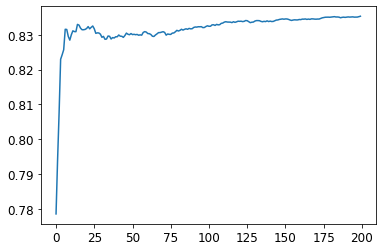

In [264]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
plt.plot([roc_auc_score(valid_y, preds[:i+1,:,1:2].mean(0)) for i in range(200)])

In [266]:
m = rf(xs, y, n_estimators=1000,  criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.9999999999999999, 0.8603354134061184)

AROC is higher for the training set than for the validation set. This may be the result of overfitting or it may have to do with the fact that the validation set we are predicting on is in the future with relative to the training set. If there is a bit of overfitting, that isn't nessesarily a problem, but nevertheless it would be nice if there were a way to find out. OOB error gives us a way to do that.

## Hyperparameter tuning

In [15]:
parameters = {'max_samples':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

clf = GridSearchCV(RandomForestClassifier(n_estimators=200, 
                                           criterion='entropy', class_weight='balanced'), parameters, 
                   scoring=make_scorer(roc_auc_score, needs_proba=True), n_jobs=-1)

clf.fit(xs, y)
clf.best_estimator_, clf.best_score_, clf.best_params_

(RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_samples=0.7, n_estimators=200),
 0.8954493566223857,
 {'max_samples': 0.7})

In [20]:
%%time
m = RandomForestClassifier(n_jobs=-1, max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           class_weight='balanced').fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 3min 31s, sys: 3.01 s, total: 3min 34s
Wall time: 39.8 s


(1.0, 0.8598540610035368)

In [21]:
%%time
m = RandomForestClassifier(n_jobs=-1, max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           class_weight='balanced').fit(xs, y)
m_roc(y, xs), m_roc(valid_y, valid_xs)

CPU times: user 1min 26s, sys: 1.18 s, total: 1min 27s
Wall time: 1min 27s


(0.9999999999999999, 0.8585872387120591)

## OOB error

In [22]:
m.oob_decision_function_.shape

(48378, 2)

In [23]:
oob_preds = m.oob_decision_function_[:,1:2]

In [24]:
roc_auc_score(y, oob_preds)

0.9030431519878634

This indicates that there is not much overfitting and that the validation score is lower than the training score because of something that sets the two datasets apart, like for instance the validation set being from the future.

# Model interpretation

Qs:

1. How confident are we in our predictions using a particular row
2. What are the most important factors when predicting a particular row and how did the influence it
3. Overall which columns are strongest predictors, which can we trow away?
4. Which columns are redundant, so both are not needed?
5. How do predictions vary as we vary these colummns

## Tree variance for prediction confidence

In [281]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8961193169013464, 0.8354894020999466)

In [282]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds[:,:,1:2].std(0).transpose()

array([[0.20760539, 0.19495618, 0.21545895, ..., 0.18165232, 0.26329893, 0.17890408]])

In [283]:
m = rf(xs, y, n_estimators=1000, class_weight='balanced', criterion='entropy',
                        max_features='sqrt', max_leaf_nodes=50,
                        min_samples_split=10)
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8959354897610776, 0.8358024681464646)

In [284]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds[:,:,1:2].std(0).transpose()

array([[0.20990302, 0.19368462, 0.20452114, ..., 0.16954727, 0.26347318, 0.18527795]])

In [285]:
m = rf(xs, y, n_estimators=1000, max_leaf_nodes=50, criterion='entropy', 
       max_features='sqrt', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(0.8960465988616506, 0.8357527836032459)

In [286]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds[:,:,1:2].std(0).transpose()

array([[0.20683482, 0.18915465, 0.20986625, ..., 0.17389331, 0.25634206, 0.17746696]])

In [287]:
m = rf(xs, y, n_estimators=1000,  criterion='entropy', class_weight='balanced')
m_roc(y, xs), m_roc(valid_y, valid_xs)

(1.0, 0.858626906210274)

In [288]:
preds = np.stack([t.predict_proba(valid_xs) for t in m.estimators_])
preds[:,:,1:2].std(0).transpose()

array([[0.14      , 0.47820916, 0.10430244, ..., 0.09444046, 0.12927103, 0.1499033 ]])

For items where std is large, trees dont agree, unsure, maybe put these items through a different classifier and try again for more confidant predictions.

## Feature importance

In [289]:
def rf_feature_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [290]:
fi = rf_feature_importance(m, xs)
fi[:10]

,cols,imp
77,TransactionID,0.042163
78,TransactionDT,0.042026
79,TransactionAmt,0.041312
1,card1,0.038060
2,card2,0.034991
94,C13,0.034534
98,D3,0.031409
7,addr1,0.029556
97,D2,0.028396
82,C1,0.027523


<AxesSubplot:ylabel='cols'>

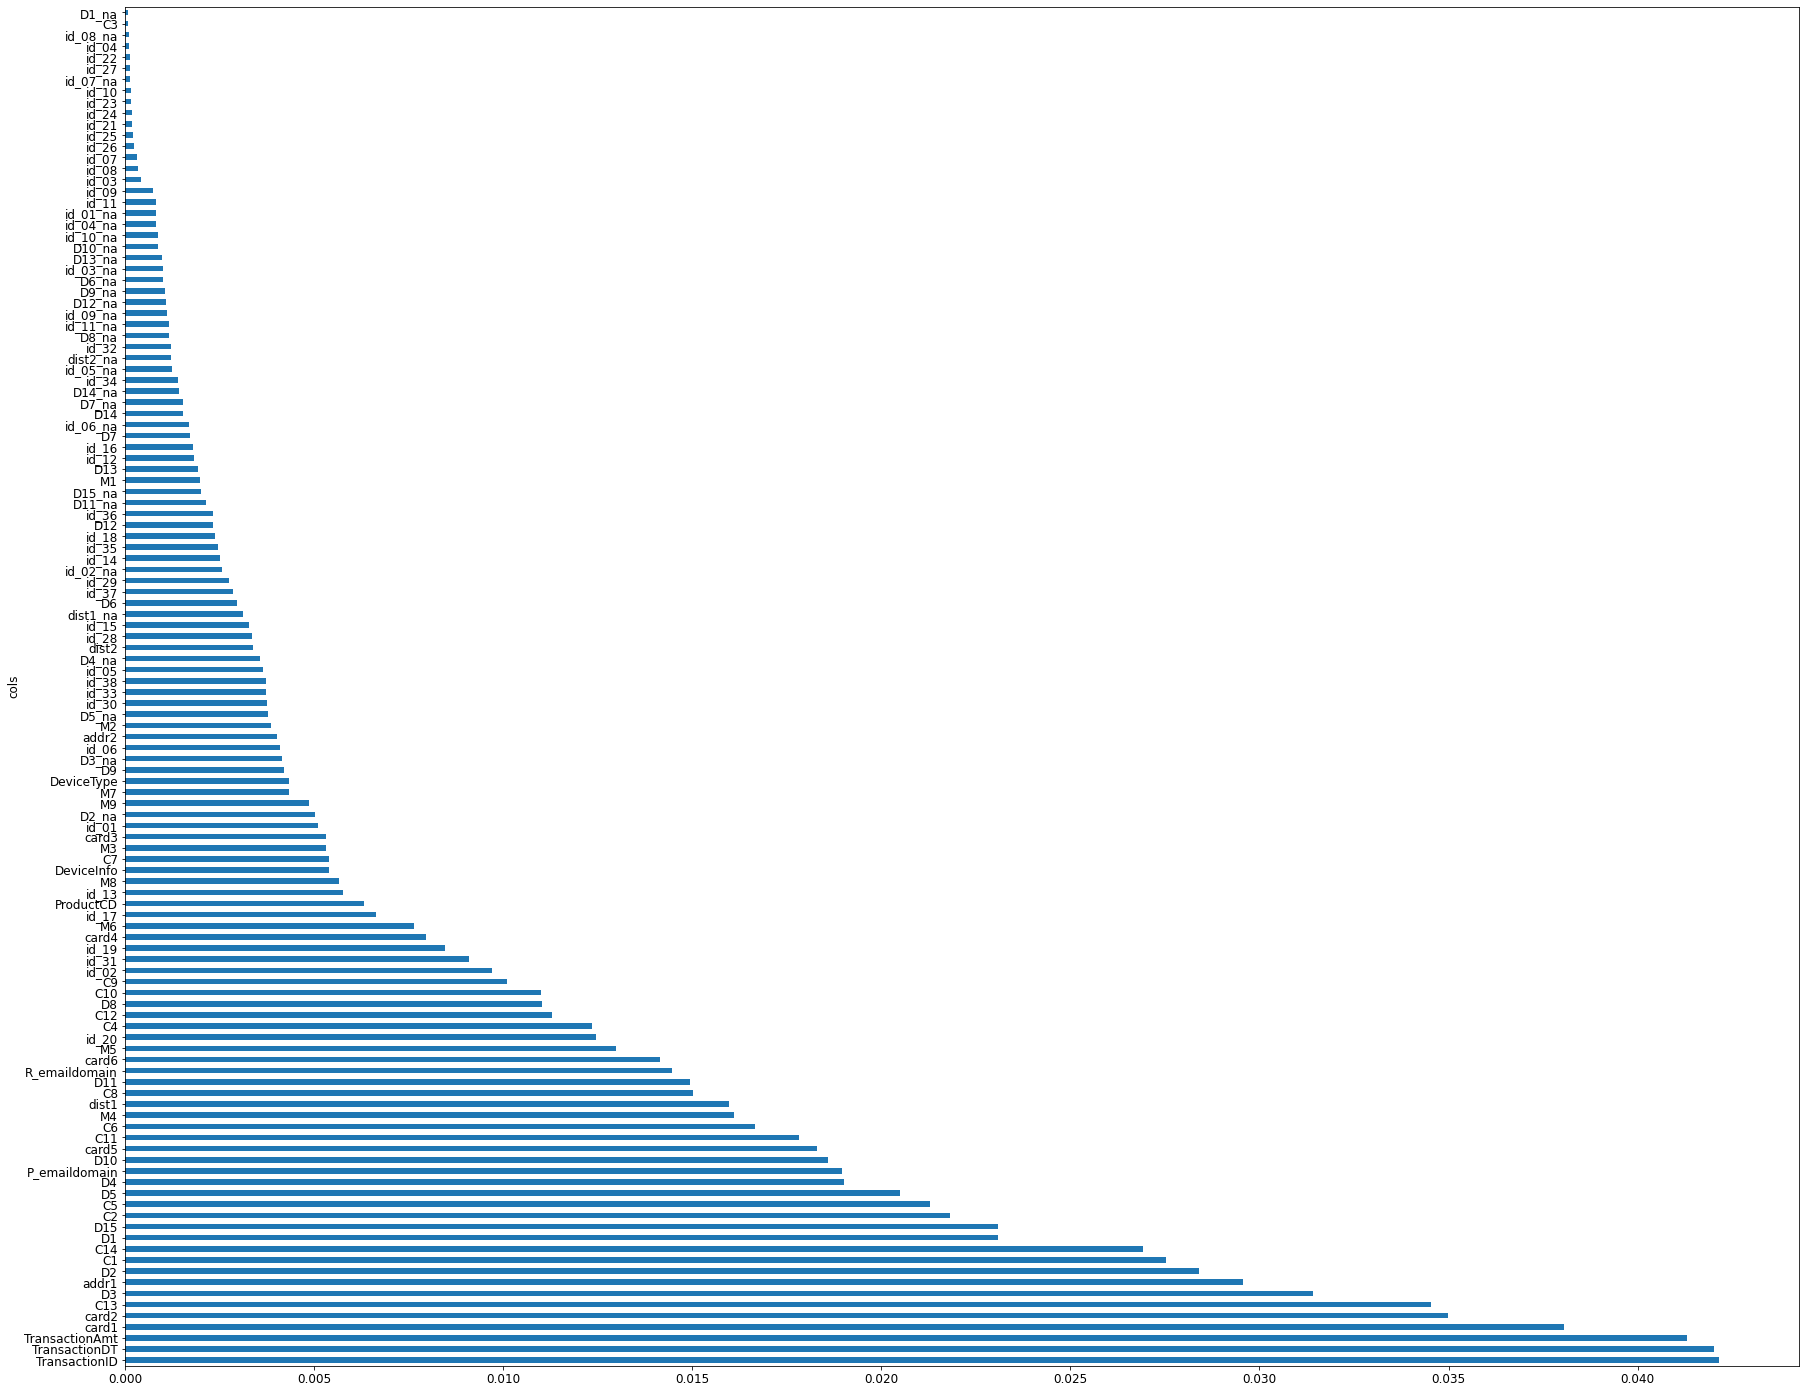

In [299]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(30,25), legend=False)
                   
plot_fi(fi)

## Removing low-importance features

In [340]:
to_keep = fi[fi.imp>0.0001].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 120


(0.999999467798778, 0.8571243494597073)

In [320]:
to_keep = fi[fi.imp>0.001].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 97


(0.9999996008490836, 0.8487602504421524)

In [321]:
#0.003 lower
to_keep = fi[fi.imp>0.002].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 79


(0.999998518303416, 0.8595160191248095)

In [322]:
#0.003 lower
to_keep = fi[fi.imp>0.003].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 68


(0.999999618992307, 0.8504375044575851)

In [323]:
#0.003 lower
to_keep = fi[fi.imp>0.004].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 57


(0.9999998548542122, 0.844443171166724)

In [324]:
#0.003 lower
to_keep = fi[fi.imp>0.005].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 50


(0.9999991654117201, 0.8491933874681158)

In [325]:
#0.003 lower
to_keep = fi[fi.imp>0.006].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 42


(0.9999968370313738, 0.8519353865871501)

In [326]:
#0.003 lower
to_keep = fi[fi.imp>0.007].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 40


(0.9999996492310127, 0.8464883846352955)

In [327]:
#0.003 lower
to_keep = fi[fi.imp>0.008].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 38


(0.999995591196695, 0.8541205715645744)

In [328]:
#0.003 lower
to_keep = fi[fi.imp>0.009].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 37


(0.9999990505046381, 0.8507539095191043)

In [344]:
#0.003 lower
to_keep = fi[fi.imp>0.01].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 35


(0.9999989174543326, 0.8474139595936445)

In [437]:
#0.003 lower
to_keep = fi[fi.imp>0.002].cols
print(f' n_features: {len(to_keep)}')

xs_imp       = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

m = rf(xs_imp, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
m_roc(y, xs_imp), m_roc(valid_y, valid_xs_imp)

 n_features: 79


(0.999997677667395, 0.8557429321733863)

In [438]:
xs_imp.columns.shape

(79,)

In [439]:
m.feature_importances_.shape

(79,)

<AxesSubplot:ylabel='cols'>

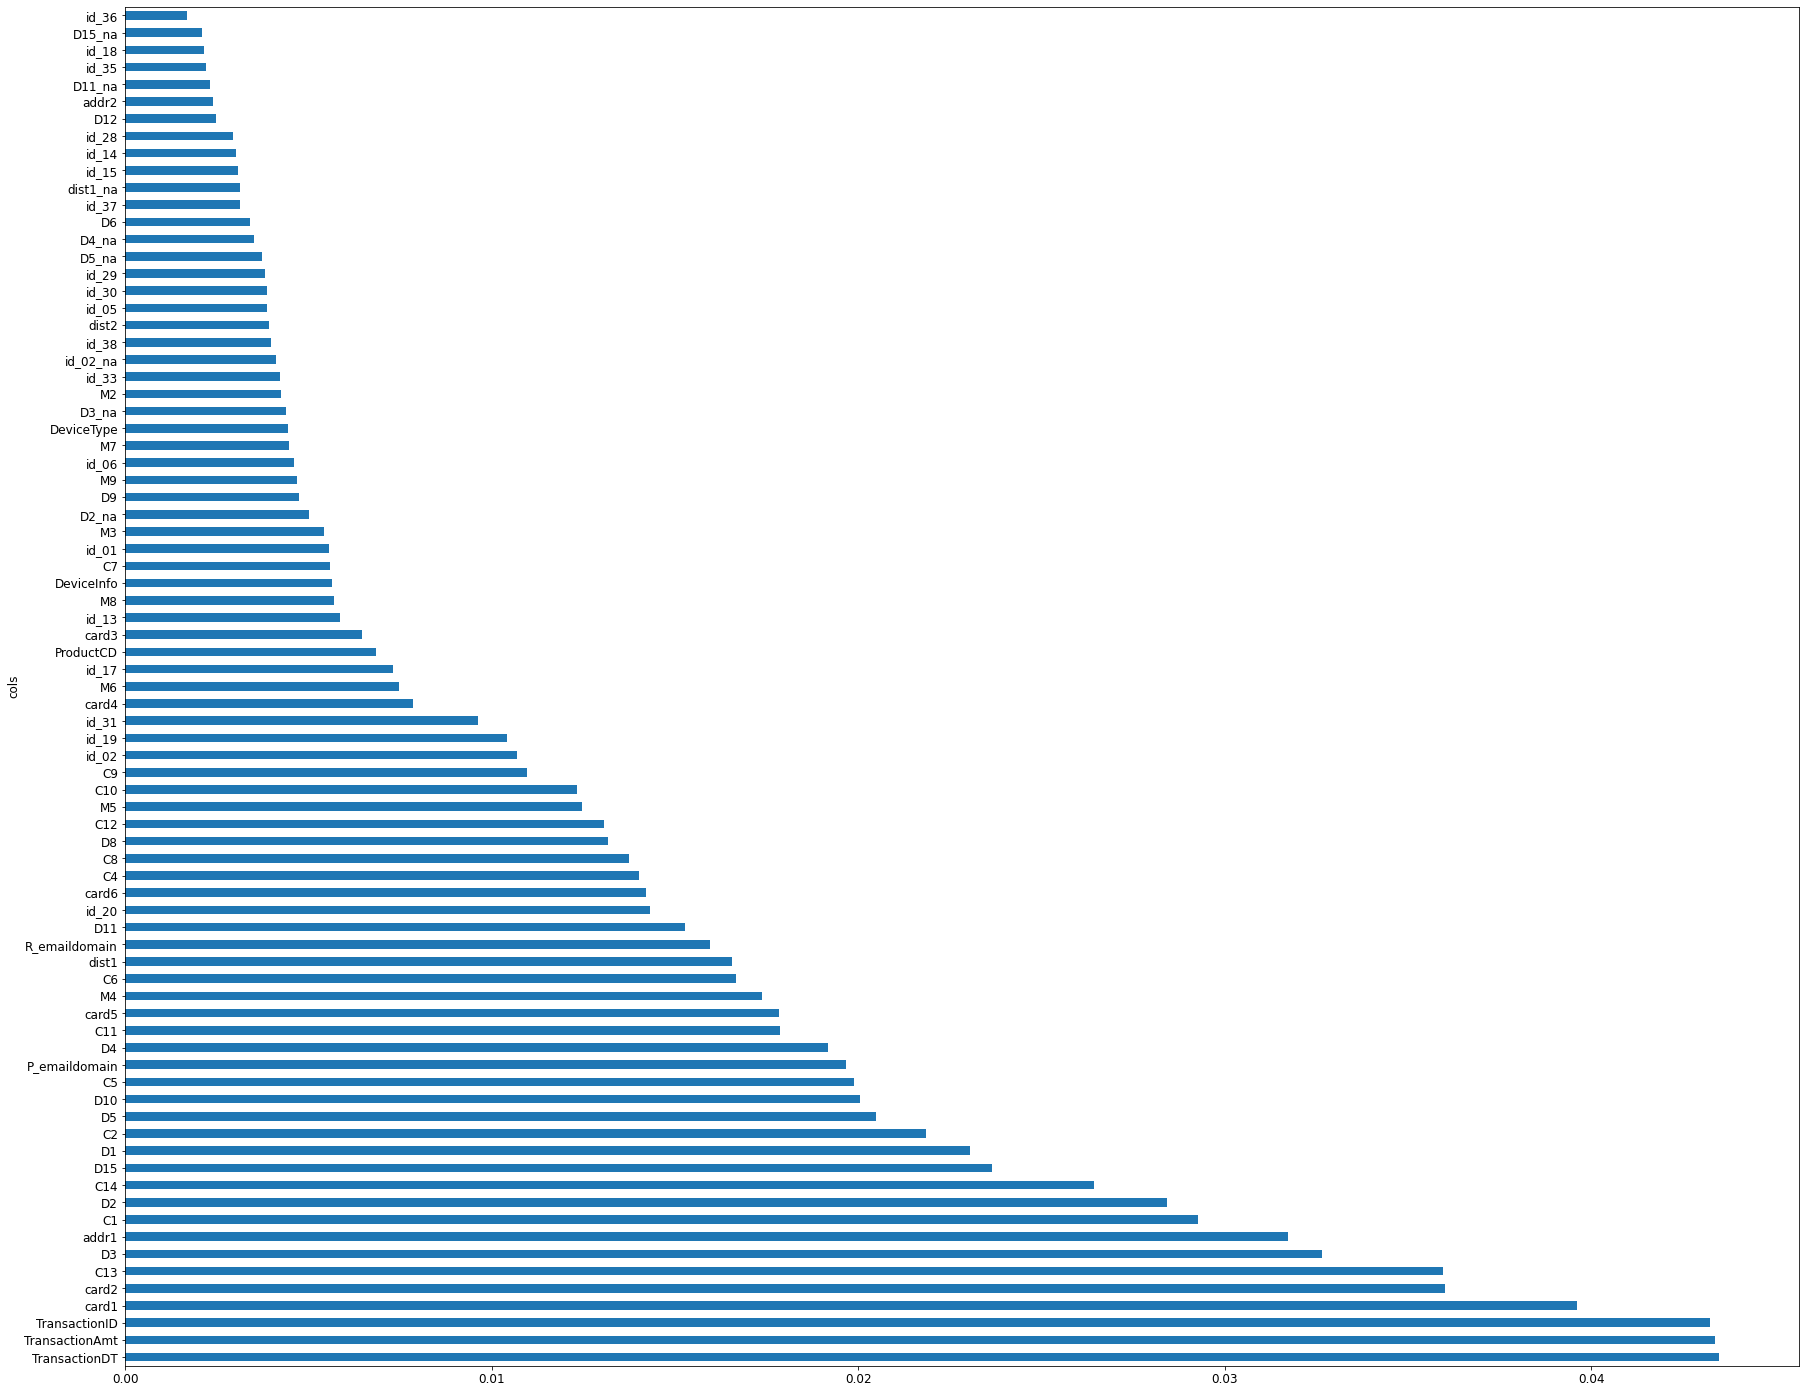

In [440]:
plot_fi(rf_feature_importance(m, xs_imp))

##  Remove redundant features

In [441]:
xs_imp.shape, valid_xs_imp.shape

((48378, 79), (10676, 79))

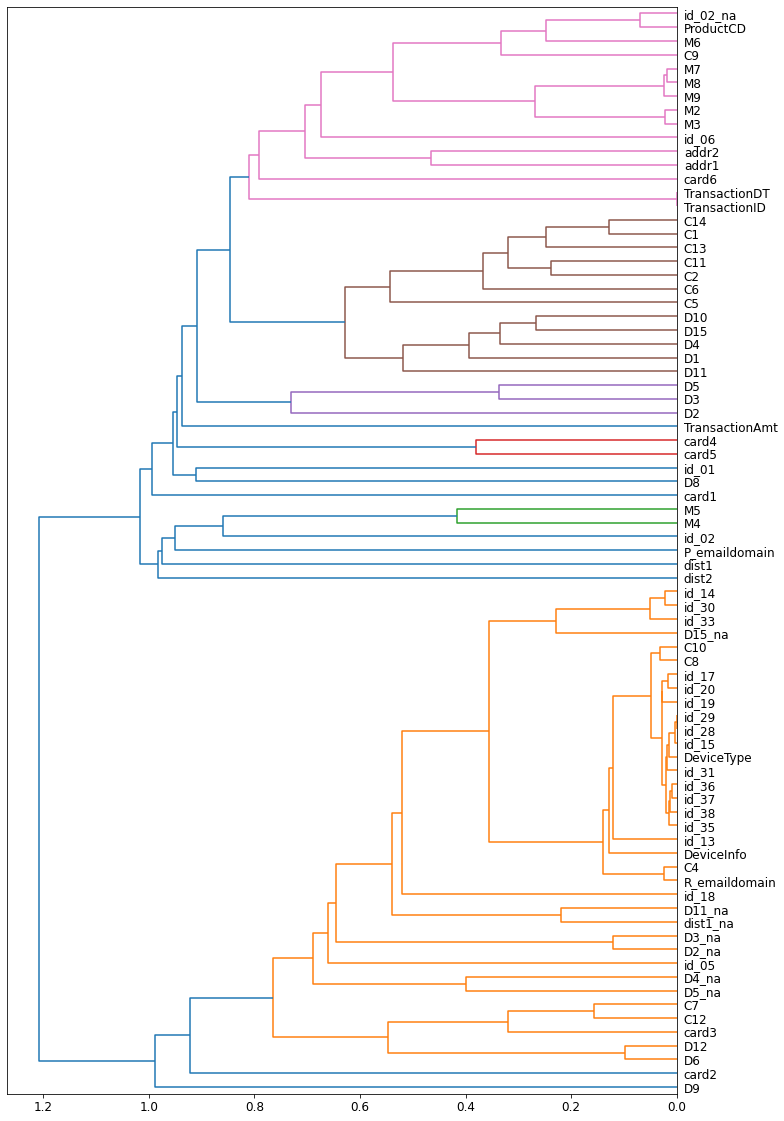

In [444]:
cluster_columns(xs_imp, figsize=(12,20))

This suggests that one of TransactionID or TransactionDT is redundant.
Other possible redundant groups: (M7, M8), (M2, M3), (id_14, id_30), (C10, C8), 
 (id_17, id_20),(id_29, id_28, id_15, DeviceType), (id_36, id_37, id_38, id_35),(C4, R_emaildomain).

In [445]:
def get_oob(df):
    m = RandomForestClassifier(n_estimators=200,  criterion='entropy', class_weight='balanced',
                               n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return roc_auc_score(y,  m.oob_decision_function_[:,1:2])

In [446]:
get_oob(xs_imp)

0.8884370104051145

In [447]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'TransactionID', 'TransactionDT', 'C10', 'C8', 'C4', 'R_emaildomain', 
    'M7', 'M8', 'M2', 'M3', 'id_14', 'id_30', 'id_17', 'id_20', 'id_29',
    'id_28', 'id_15', 'DeviceType', 'id_36', 'id_37', 'id_38', 'id_35')}

{'TransactionID': 0.8953759829877525,
 'TransactionDT': 0.8930170373577196,
 'C10': 0.8915396104790227,
 'C8': 0.89151528041634,
 'C4': 0.8914427559043613,
 'R_emaildomain': 0.8920820565745381,
 'M7': 0.8931107350114958,
 'M8': 0.8901882790034911,
 'M2': 0.8917399842391028,
 'M3': 0.8848289159341723,
 'id_14': 0.8927779882929278,
 'id_30': 0.8910940552446156,
 'id_17': 0.8930934747582283,
 'id_20': 0.8893255747749007,
 'id_29': 0.8872495666672504,
 'id_28': 0.8890919505339284,
 'id_15': 0.8921985844511897,
 'DeviceType': 0.8963351547355701,
 'id_36': 0.8914879022921134,
 'id_37': 0.8943642563692633,
 'id_38': 0.8897577282148994,
 'id_35': 0.8930063086649038}

In [448]:
to_drop = ['TransactionID', 'C10', 'C4', 'M8', 'M3', 'id_30', 'id_20',
          'id_29', 'id_28', 'id_15', 'id_36', 'id_38', 'id_35']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8968967721705594

In [449]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [450]:
xs_final.shape, valid_xs_final.shape

((48378, 66), (10676, 66))

In [456]:
(path/'xs_final.pkl').save(xs_final)
(path/'valid_xs_final.pkl').save(valid_xs_final)

In [25]:
xs_final = (path/'xs_final.pkl').load()
valid_xs_final = (path/'valid_xs_final.pkl').load()

In [27]:
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           class_weight='balanced').fit(xs_final, y)
m_roc(y, xs_final), m_roc(valid_y, valid_xs_final)

(1.0, 0.8540103840695328)

## Partial dependance

In [460]:
valid_xs_final.columns

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'C13', 'D3',
       'addr1', 'D2', 'C1', 'C14', 'D1', 'D15', 'C2', 'C5', 'D5', 'D4',
       'P_emaildomain', 'D10', 'card5', 'C11', 'C6', 'M4', 'dist1', 'C8',
       'D11', 'R_emaildomain', 'card6', 'M5', 'C12', 'D8', 'C9', 'id_02',
       'id_31', 'id_19', 'card4', 'M6', 'id_17', 'ProductCD', 'id_13',
       'DeviceInfo', 'C7', 'card3', 'id_01', 'D2_na', 'M9', 'M7', 'DeviceType',
       'D9', 'D3_na', 'id_06', 'addr2', 'M2', 'D5_na', 'id_33', 'id_05',
       'D4_na', 'dist2', 'dist1_na', 'D6', 'id_37', 'id_02_na', 'id_14',
       'id_18', 'D12', 'D11_na', 'D15_na'],
      dtype='object')

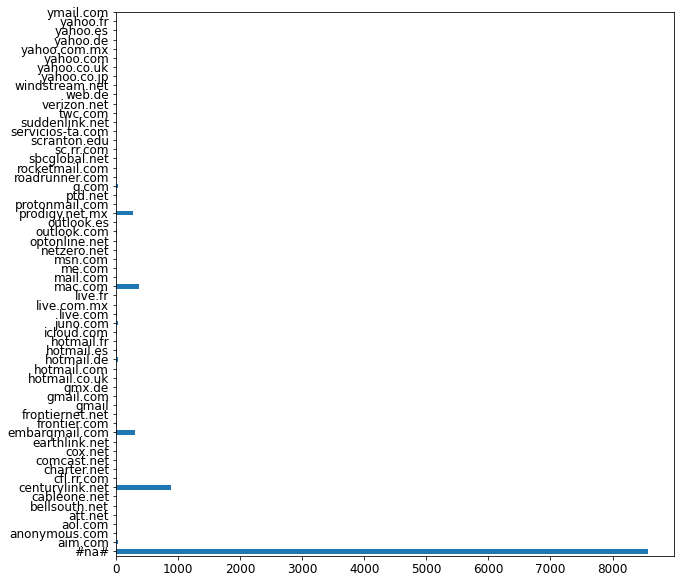

In [461]:
p = valid_xs_final['R_emaildomain'].value_counts(sort=False).plot.barh(figsize=(10,10))
c = to.classes['R_emaildomain']
plt.yticks(range(len(c)), c);

In [380]:
# I want to look at the Fraud column for all values in the training set where R_emaildomain is missing
n = 1000
pd.options.display.max_rows = n
train_ss[['isFraud','R_emaildomain']].head(n)

,isFraud,R_emaildomain
57195,0,NaN
312877,0,NaN
195195,1,NaN
21600,0,NaN
12253,0,NaN
377675,0,anonymous.com
160611,0,gmail.com
86738,0,hotmail.com
426550,0,NaN
34293,0,NaN


In [462]:
pd.options.display.max_rows = 20

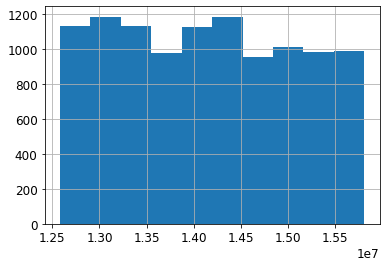

In [463]:
ax = valid_xs_final['TransactionDT'].hist()

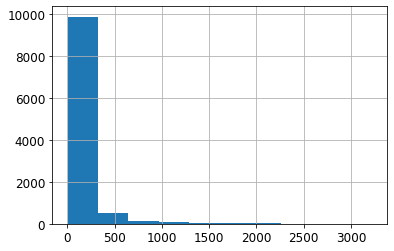

In [464]:
ax = valid_xs_final['TransactionAmt'].hist()

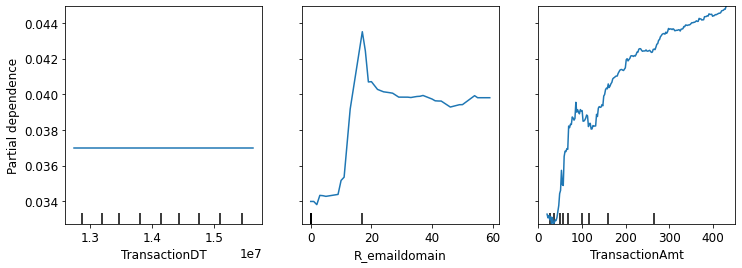

In [465]:
from sklearn.inspection import plot_partial_dependence

_, ax = plt.subplots(figsize=(12,4))
plot_partial_dependence(m, valid_xs_final, ['TransactionDT','R_emaildomain', 'TransactionAmt'],
                        grid_resolution=200, ax=ax)

In [467]:
valid_xs_final['R_emaildomain'].unique()

array([ 0,  2, 55, 17, 20, 36, 54, 35,  5, 42, 31, 10, 24, 43, 22,  3, 32, 57, 25, 11, 27, 50, 18, 40, 58, 34,  4, 26, 46, 59, 56, 19, 49, 29, 37,  9, 41, 13, 23,  1, 33], dtype=int8)

## Tree Interperator

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

ModuleNotFoundError: No module named 'treeinterpreter'

In [470]:
row = valid_xs_final[:5]

In [471]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [472]:
assert torch.allclose(torch.tensor(prediction[0,1]), torch.tensor(bias[0,1] + contributions[0].sum(axis=0)[1]))

In [1]:
waterfall(valid_xs_final.columns, contributions[1][:,1], threshold=0.08, 
          rotation_value=90, formatting='{:,.3f}')

NameError: name 'waterfall' is not defined

## Finding Out-of-Domain Data

In [474]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))

m = rf(df_dom, is_valid)
rf_feature_importance(m, df_dom)[:6]

,cols,imp
0,TransactionDT,0.814529
2,card1,0.018919
11,D15,0.017313
32,id_31,0.010485
17,D10,0.009992
15,D4,0.008364


In [475]:
m = rf(xs_final, y, n_estimators=200,  criterion='entropy', class_weight='balanced')
print('orig', m_roc(valid_y, valid_xs_final))

for c in ('TransactionDT','card1','D15'):
    m = rf(xs_final.drop(c,axis=1), y, n_estimators=200,  criterion='entropy', class_weight='balanced')
    print(c, m_roc(valid_y, valid_xs_final.drop(c,axis=1)))

orig 0.847393925503637
TransactionDT 0.858746175826119
card1 0.8469418228724663
D15 0.8476297935233259


Can try droping columns that are older to see if keeping just more recent data makes a difference

<AxesSubplot:>

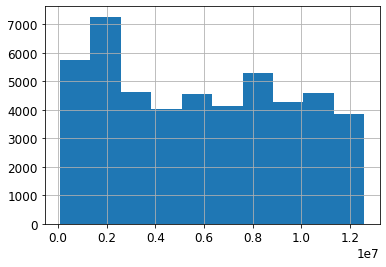

In [476]:
xs['TransactionDT'].hist()

In [477]:
filt = xs['TransactionDT']>=0
xs_filt = xs_final[filt]
y_filt = y[filt]

In [478]:
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(0.9999999758090353, 0.8601589798534522)

In [479]:
filt = xs['TransactionDT']>0.6e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.8536255959807876)

In [480]:
filt = xs['TransactionDT']>0.8e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.8484385029566309)

In [481]:
filt = xs['TransactionDT']>1e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.8435094490117718)

In [482]:
filt = xs['TransactionDT']>1.2e7
xs_filt = xs_final[filt]
y_filt = y[filt]
m = rf(xs_filt, y_filt, n_estimators=1000, criterion='entropy', class_weight='balanced')
m_roc(y_filt, xs_filt), m_roc(valid_y, valid_xs_final)

(1.0, 0.7855362685145042)

In [483]:
xs[cat].nunique()

ProductCD       5
card1        5602
card2         500
card3          63
card4           5
             ... 
id_07_na        2
id_08_na        2
id_09_na        2
id_10_na        2
id_11_na        2
Length: 77, dtype: int64

In [484]:
xs_final.nunique()

TransactionDT     48214
TransactionAmt     5062
card1              5602
card2               500
C13                 782
                  ...  
id_14                21
id_18                14
D12                 461
D11_na                2
D15_na                2
Length: 66, dtype: int64

## Imbalanced learn

## RandomUnderSampler

In [30]:
xs_final = (path/'xs_final.pkl').load()
valid_xs_final = (path/'valid_xs_final.pkl').load()

In [45]:
xs_final.shape, valid_xs_final.shape

((48378, 66), (10676, 66))

In [32]:
from imblearn.under_sampling import RandomUnderSampler

In [36]:
RandomUnderSampler?

In [37]:
rus = RandomUnderSampler(random_state=42)

In [76]:
xs_final_rus, y_rus = rus.fit_resample(xs_final, y)

In [77]:
valid_xs_final_rus, valid_y_rus = rus.fit_resample(valid_xs_final, valid_y)

In [78]:
xs_final_rus.shape, valid_xs_final_rus.shape

((3548, 66), (726, 66))

In [80]:
 y_rus.shape, valid_y_rus.shape

((3548,), (726,))

In [81]:
y_rus.items

<bound method Series.items of 0       0
1       0
2       0
3       0
4       0
       ..
3543    1
3544    1
3545    1
3546    1
3547    1
Name: isFraud, Length: 3548, dtype: int8>

In [82]:
y_rus.sum()

1774

In [83]:
assert y_rus.sum()==len(y_rus)/2

In [84]:
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           ).fit(xs_final_rus, y_rus)
m_roc(y_rus, xs_final_rus), m_roc(valid_y_rus, valid_xs_final_rus)

(1.0, 0.8360312364820253)

In [85]:
m = RandomForestClassifier(max_samples=0.66, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           ).fit(xs_final_rus, y_rus)
m_roc(y_rus, xs_final_rus), m_roc(valid_y_rus, valid_xs_final_rus)

(0.9999980934683497, 0.8380385371369594)

## RandomOverSampler

In [86]:
from imblearn.over_sampling import RandomOverSampler

In [71]:
RandomOverSampler?

In [87]:
ros = RandomOverSampler(random_state=42)

In [88]:
xs_final_ros, y_ros = ros.fit_resample(xs_final, y)
valid_xs_final_ros, valid_y_ros = ros.fit_resample(valid_xs_final, valid_y)

In [89]:
xs_final_ros.shape, valid_xs_final_ros.shape

((93208, 66), (20626, 66))

In [91]:
 y_ros.shape, valid_y_ros.shape

((93208,), (20626,))

In [93]:
y_ros.sum()

46604

In [94]:
assert y_ros.sum()==len(y_ros)/2

In [100]:
%%time
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=1000,  criterion='entropy', 
                           n_jobs=-1).fit(xs_final_ros, y_ros)
m_roc(y_ros, xs_final_ros), m_roc(valid_y_ros, valid_xs_final_ros)

CPU times: user 8min 56s, sys: 8.48 s, total: 9min 5s
Wall time: 1min 43s


(0.9999999999999999, 0.8535463995180276)

In [99]:
%%time
m = RandomForestClassifier(max_samples=0.7, oob_score=True,
                           n_estimators=200,  criterion='entropy', 
                           n_jobs=-1).fit(xs_final_ros, y_ros)
m_roc(y_ros, xs_final_ros), m_roc(valid_y_ros, valid_xs_final_ros)

CPU times: user 1min 30s, sys: 1.18 s, total: 1min 31s
Wall time: 16.5 s


(1.0, 0.8529796812874453)